In [1]:
import PIL
import requests
import torch
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

from diffusers import StableDiffusionDiffEditPipeline
from diffusers import DiffusionPipeline, DDIMScheduler, DDIMInverseScheduler


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

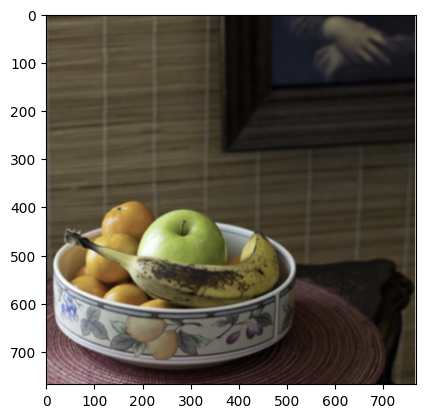

In [2]:
img_url = "https://github.com/Xiang-cd/DiffEdit-stable-diffusion/raw/main/assets/origin.png"

init_image = download_image(img_url).resize((768, 768))

plt.imshow(np.array(init_image))

In [3]:
pipe = StableDiffusionDiffEditPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.inverse_scheduler = DDIMInverseScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to DDIMInverseScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


/media/mountHDD2/git/hfs/.env/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


9216 <class 'numpy.ndarray'>


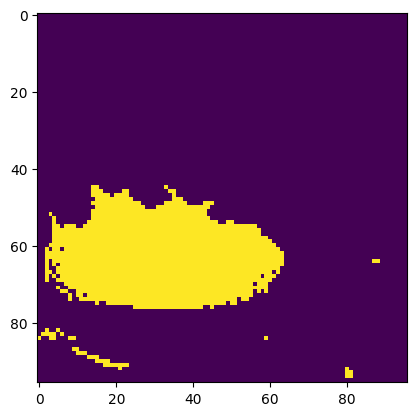

In [4]:
mask_prompt = "A bowl of fruits"
prompt = "A bowl of pears"

mask_image = pipe.generate_mask(image=init_image, source_prompt=prompt, target_prompt=mask_prompt)

print(mask_image.size, type(mask_image))

plt.imshow(np.array(mask_image).transpose(1, 2, 0))

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

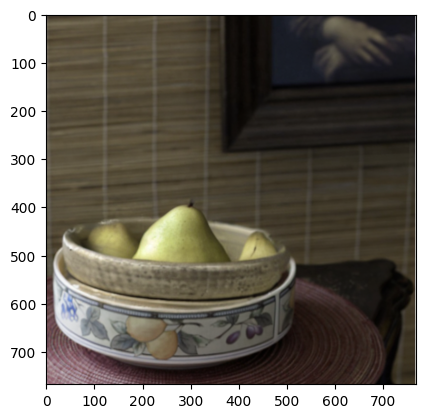

In [5]:
image_latents = pipe.invert(image=init_image, prompt=mask_prompt).latents

image = pipe(prompt=prompt, mask_image=mask_image, image_latents=image_latents).images[0]

plt.imshow(np.array(image))

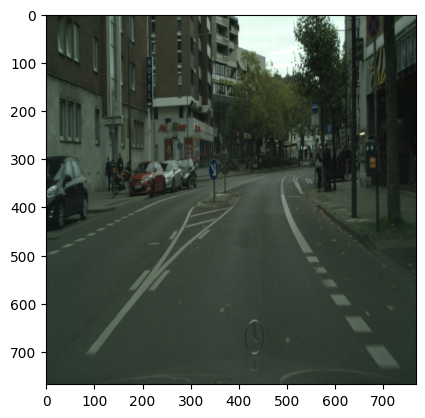

In [6]:
sample_path = '/media/mountHDD3/data_storage/cityscapes/unzip/leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000086_000019_leftImg8bit.png'
sample_img = PIL.Image.open(sample_path).convert("RGB").resize((768, 768))

plt.imshow(np.array(sample_img))

9216 <class 'numpy.ndarray'>


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

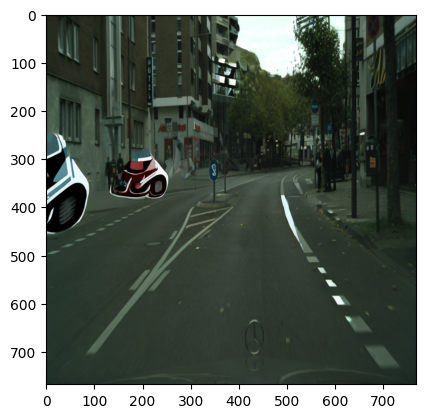

In [7]:
mask_prompt = "road"
prompt = "more cars"

mask_image = pipe.generate_mask(image=sample_img, source_prompt=prompt, target_prompt=mask_prompt)

print(mask_image.size, type(mask_image))

# plt.imshow(np.array(mask_image).transpose(1, 2, 0))

image_latents = pipe.invert(image=sample_img, prompt=mask_prompt).latents

image = pipe(prompt=prompt, mask_image=mask_image, image_latents=image_latents).images[0]

plt.imshow(np.array(image))

9216 <class 'numpy.ndarray'>


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

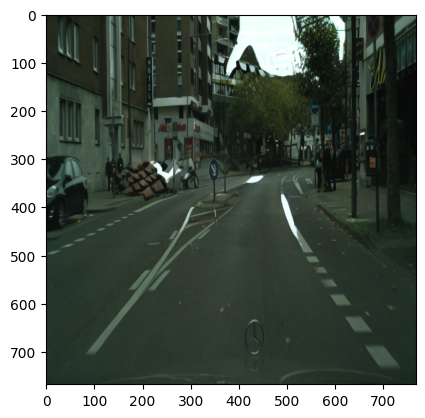

In [9]:
mask_prompt = "human"
prompt = "more human"

mask_image = pipe.generate_mask(image=sample_img, source_prompt=prompt, target_prompt=mask_prompt)

print(mask_image.size, type(mask_image))

# plt.imshow(np.array(mask_image).transpose(1, 2, 0))

image_latents = pipe.invert(image=sample_img, prompt=mask_prompt).latents

image = pipe(prompt=prompt, mask_image=mask_image, image_latents=image_latents).images[0]

plt.imshow(np.array(image))